# Using MLPClassifier for classifying hand-written digits


In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_digits
from sklearn.metrics import classification_report

In [8]:
digits = load_digits()
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [9]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [10]:
from sklearn.utils.multiclass import type_of_target
type_of_target(digits.target)

'multiclass'

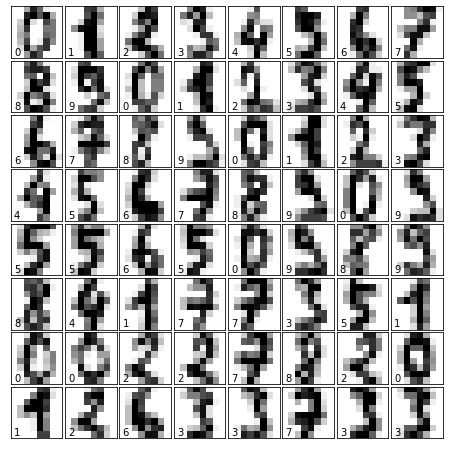

In [11]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

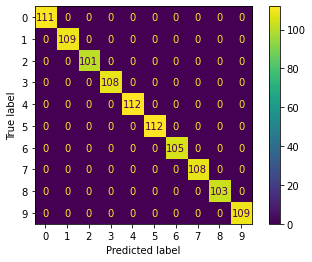

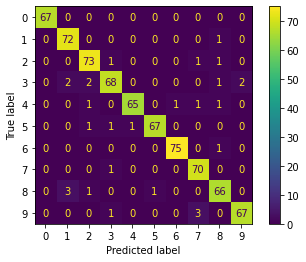

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, 
                                                    digits.target,
                                                   test_size =0.4)


clf = MLPClassifier(hidden_layer_sizes=(50,40,25),
                    activation='logistic', solver='adam', 
                    random_state=1,max_iter=3000)
clf.fit(X_train, y_train)
clf.predict(X_train)



import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
import numpy as np

predicted_y= clf.predict(X_train)
plot_confusion_matrix(clf, X_train, y_train)  
plt.show()


predicted_y= clf.predict(X_train)
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

In [83]:
# training
target_names=np.unique(digits.target)
target_names=[str(x) for x in target_names]
predicted_y= clf.predict(X_train)
print(classification_report(y_train, predicted_y, target_names=target_names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00       118
           2       1.00      1.00      1.00       107
           3       1.00      1.00      1.00       105
           4       1.00      1.00      1.00       108
           5       1.00      1.00      1.00       107
           6       1.00      1.00      1.00       112
           7       1.00      1.00      1.00       113
           8       1.00      1.00      1.00       102
           9       1.00      1.00      1.00       100

    accuracy                           1.00      1078
   macro avg       1.00      1.00      1.00      1078
weighted avg       1.00      1.00      1.00      1078



In [85]:
# testing
target_names=np.unique(digits.target)
target_names=[str(x) for x in target_names]
predicted_y= clf.predict(X_test)
print(classification_report(y_test, predicted_y, target_names=target_names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       0.94      0.99      0.96        73
           2       0.94      0.96      0.95        76
           3       0.94      0.91      0.93        75
           4       0.98      0.94      0.96        69
           5       0.99      0.96      0.97        70
           6       0.99      0.99      0.99        76
           7       0.93      0.99      0.96        71
           8       0.93      0.93      0.93        71
           9       0.97      0.94      0.96        71

    accuracy                           0.96       719
   macro avg       0.96      0.96      0.96       719
weighted avg       0.96      0.96      0.96       719

